# Report 1 : Regression and Classification

Clément Antheaume, Camille-Amaury Juge.

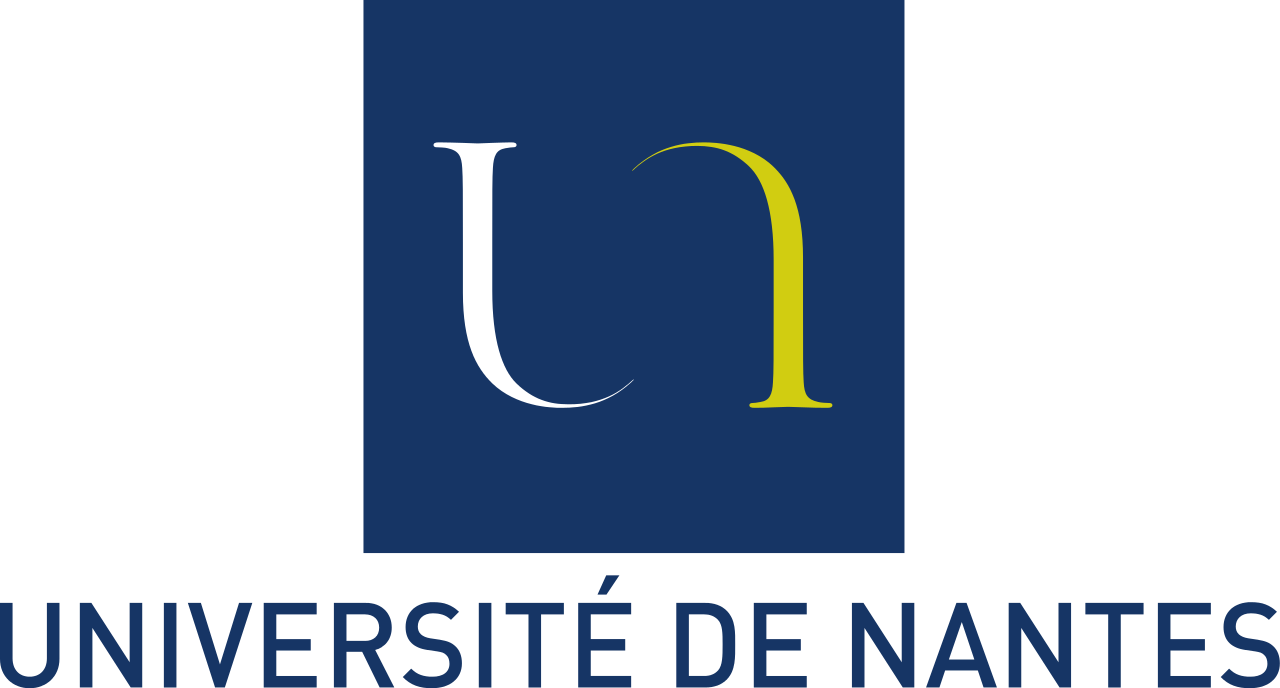

In [3]:
from IPython.display import Image
display(Image(filename='nantes.png'))

## Definitions of indicators :

### Classification (categorical class)

Considering TP = Numbers of individuals well classified positive, TN = Numbers of individuals well classified negative and FP Numbers of positive individuals classified negative, FN Numbers of negative individuals classified positive.

#### Precision
* TP / TP + TN



#### Recall
* TP / TP + FN
* Represent the sensitivity of the model.



#### Specificity
* TN/FP+TN

#### Sensitivity
* TP/TP+FN

#### F-measure
* 2 * ( (Precision * Recall) / (Precision + Recall) )
* Mathematicly, the harmonic mean of recall and precision.



#### Rand index
* TP + TN / TP + FP + FN +TN
* Percentage of correct decisions made by the classification algorithm.
* Can be used in clustering to measure the similarity  between two clusters.



#### ROC Curve
* Function giving the number of True positive rate (y) given the false negative rate.
* The goal is to have a curve as close as possible to y = x.

### Regression (numeric class)

#### Mean Squared Error

* MSE belongs to R<sup>+</sup>
* MSE = Average(Indicators - Indicator<sup>2</sup>)
* <=> MSE = Bias(Indicator)<sup>2</sup> + Variance(Indicator)
* As we can see, it can be defined as a mesure of the bias and variance of the Indicator
* It evaluates the quadratic risk of the Indicator
* Sensitive to outliers (large error values), thus usefull when we want our model to be quite stable



#### Root Mean Squared-Error

* RMSE belongs to R<sup>+</sup>
* RMSE = Root(MSE) = Root(Average(Indicators - Indicator<sup>2</sup>))
* <=> RMSE = Root(Bias(Indicator)<sup>2</sup> + Variance(Indicator))
* As we can see, it can be defined as a mesure of the standard deviation of the Indicator
* It evaluates the quadratic risk of the Indicator
* Even more Sensitive to outliers (large error values), thus usefull when we want our model to avoid large errors

#### Mean Bias Error

* MBE belongs to R
* MBE = Average(Y<sub>label</sub> - Y<sub>predicted</sub>)
* As we can see, it can be defined as a mesure of the bias of the error between labels and predictions
* It indicates if the model surestimate (if MBE < 0)  or underestimate (if MBE > 0) the output 

#### Systematic Error

* SE or SD belongs to R<sup>+</sup>
* SD = Root(RMSE(error)<sup>2</sup> - MBE(error)<sup>2</sup>)
* As we can see, it can be defined as a mesure of the MSE-Bias so it reduces the importance of larger errors

#### Mean Absolute Error

* MAE belongs to R<sup>+</sup>
* MAE = Average(|Y<sub>label</sub> - Y<sub>predicted</sub>|)
* As we can see, it can be defined as a mesure of the bias, not regarding to its orientation
* MAE will not be sensible to outliers

#### Mean Absolute Pourcentage Error

* MAPE belongs to R<sup>+</sup>
* MAPE = Average(|(Y<sub>label</sub> - Y<sub>predicted</sub>) / Y<sub>label</sub>|)
* As we can see, it can be defined as a mesure of the bias, not regarding to its orientation 
* It has the advantage to show ratio errors rather than value errors

#### R<sup>2</sup>

* R<sup>2</sup> belongs to R, R<sup>2</sup> belongs to [-1, 1]
* R<sup>2</sup> = Correlation(Y<sub>predicted</sub>, Y<sub>label</sub>)
* <=> R<sup>2</sup> = Sum((Y<sub>predicted</sub> - Average(Y<sub>label</sub>))<sup>2</sup>/Sum((Y<sub>label</sub> - Average(Y<sub>label</sub>))<sup>2</sup>
* As we can see, it can be defined as a mesure of the correlation of the error
* It has the advantages to put every error on the same scale

### Validation Techniques

#### Hold Out Cross Validation
<br/>
Separate the dataset in two sub-datasets :

* Training Set is used to train the model.
* Testing Set is used to validate the model with indicators.

The splitting is done with a percentage of the initial dataset (for instance 80%/20%).

This methods has the advantage to avoid overfitting. But it is not stable since we still have a low probability to have the worst configuration in our sub-datasets.

#### K-Fold Cross Validation
<br/>
Separate the dataset S in k sub-datasets, then each subsets contains N/k individuals.
Thus, we iterate k times on all sub-datasets :

* we create a training set with k-1 sub-datasets
* we create a testing set with the last sub-datasets
* we compute the empirical error

When the k-iterations are done, we compute the mean of the empirical error. The we have a stable validation indicator over multiple configuration (k) of our datasets.

## Classification with Python

### Imports

In [100]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import random
import disarray

### Mushroom Decision Tree

I modified the Mushroom dataset to be a xlsx because there were way too many different inputs and I couldn't find one that would make the process easier to us.

In [31]:
classes = [u'Comestible',u'Non Comestible']
data = pd.read_csv('Mushroom.csv', encoding='utf-8')
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X, Y)

In [70]:
tree.export_graphviz(dtree, out_file="mushroom.dot", feature_names=X.columns, class_names=classes)

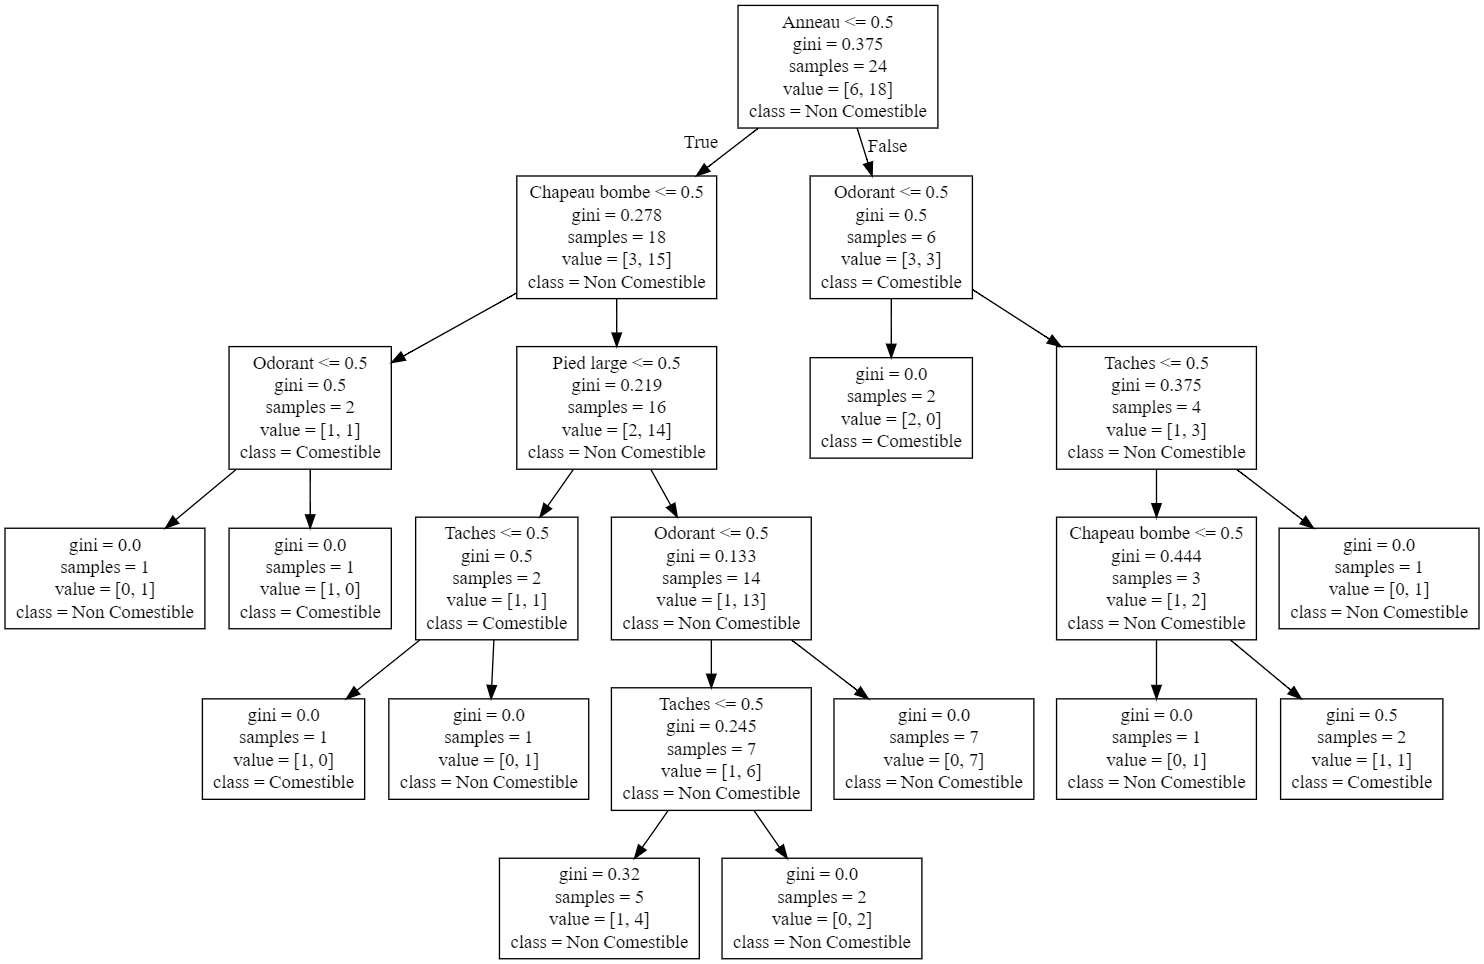

In [71]:
display(Image(filename='mushroom.png'))

### Weather Decision Tree

In [112]:
classes = ['Umbrella','No umbrella']
data = pd.read_excel('Meteo.xls').replace({True : 1, False : 0, 'high' : 1, 'normal' : 0, 'N' : 0, 'P' : 1})
data = pd.get_dummies(data,  columns=["Tempreature", "Outlook"])
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X, Y)

In [117]:
tree.export_graphviz(dtree, out_file="meteo.dot", feature_names=X.columns, class_names=classes)

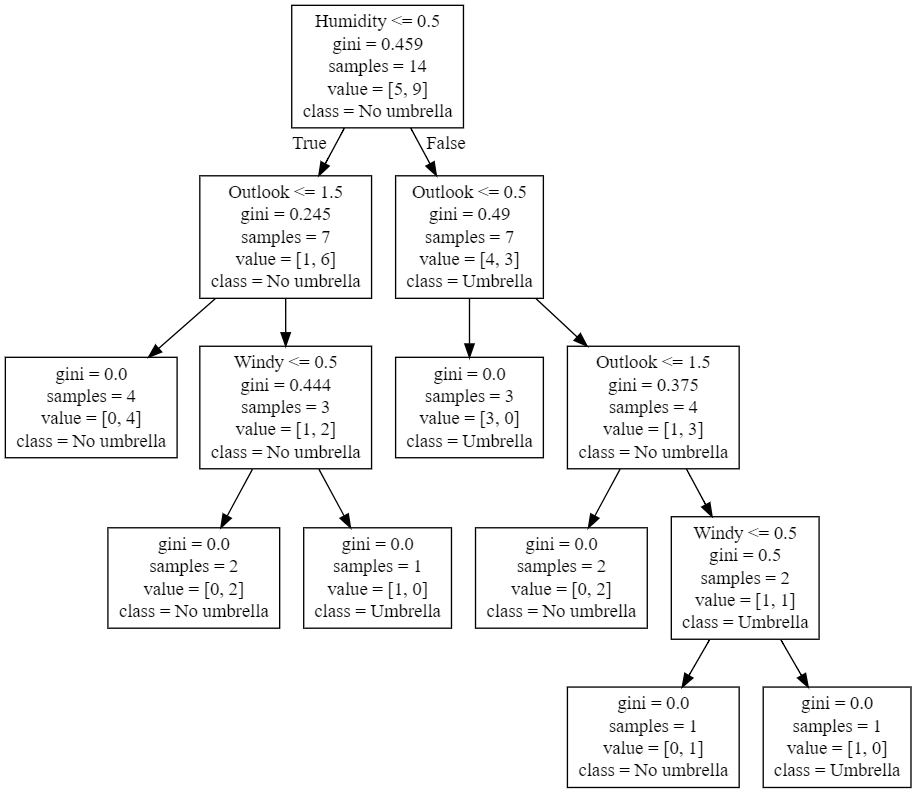

In [118]:
display(Image(filename='meteo.png'))

### Some comparison on the Iris dataset 

#### Decision Tree Classification

In [151]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
Y = pd.DataFrame(iris.target)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
classes = iris.target_names

In [152]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)

In [153]:
tree.export_graphviz(dtree, out_file="iris.dot", feature_names=features, class_names=classes)

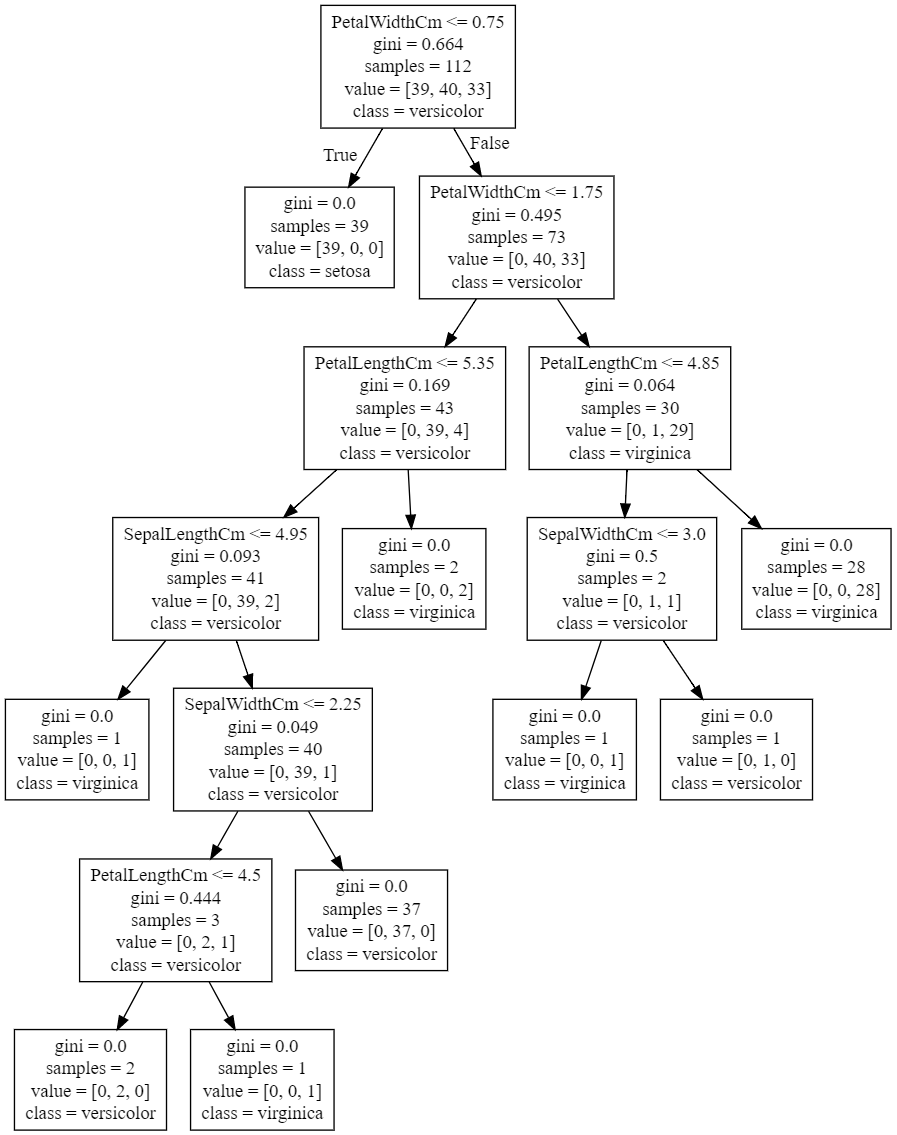

In [154]:
display(Image(filename='iris.png'))

In [155]:
def get_metrics(conf): # Compute the generic metrics from the confusion matrix fro each class in the matrix
    # Computing indicators sub-terms
    return pd.DataFrame(conf).da.export_metrics()

In [156]:
Y_pred = dtree.predict(X_test)
conf_ = confusion_matrix(Y_test, Y_pred).astype(int)
get_metrics(conf_)

,0,1,2,micro-average
accuracy,1.0,0.868421,0.868421,0.912281
f1,1.0,0.827586,0.705882,0.868421
false_discovery_rate,0.0,0.250000,0.142857,0.131579
false_negative_rate,0.0,0.076923,0.400000,0.131579
false_positive_rate,0.0,0.160000,0.035714,0.065789
negative_predictive_value,1.0,0.954545,0.870968,0.934211
positive_predictive_value,1.0,0.750000,0.857143,0.868421
precision,1.0,0.750000,0.857143,0.868421
recall,1.0,0.923077,0.600000,0.868421
sensitivity,1.0,0.923077,0.600000,0.868421


We can see that the first class is clearly well predicted but both second and third class are 0.912...

It means that the model is able to correctly classify 947 out of 1000 times (rounded values)

#### Random Forest Classification

In [135]:
rf = AdaBoostClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, np.ravel(Y_train))

AdaBoostClassifier(n_estimators=100, random_state=0)

In [136]:
Y_pred = rf.predict(X_test)

rf_conf = confusion_matrix(Y_test, Y_pred).astype(int)
get_metrics(rf_conf)

,0,1,2,micro-average
accuracy,1.0,0.947368,0.947368,0.964912
f1,1.0,0.933333,0.909091,0.947368
false_discovery_rate,0.0,0.125000,0.000000,0.052632
false_negative_rate,0.0,0.000000,0.166667,0.052632
false_positive_rate,0.0,0.083333,0.000000,0.026316
negative_predictive_value,1.0,1.000000,0.928571,0.973684
positive_predictive_value,1.0,0.875000,1.000000,0.947368
precision,1.0,0.875000,1.000000,0.947368
recall,1.0,1.000000,0.833333,0.947368
sensitivity,1.0,1.000000,0.833333,0.947368


We can see that the first class is clearly well predicted but both second and third class are 0.947...

It means that the model is able to correctly classify 964 out of 1000 times (rounded values)

The prediction is then better than the decision tree.

#### AdaBoost Classification

In [137]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, np.ravel(Y_train))

AdaBoostClassifier(n_estimators=100, random_state=0)

In [138]:
Y_pred = ada.predict(X_test)

ada_conf = confusion_matrix(Y_test, Y_pred).astype(int)
get_metrics(ada_conf)

,0,1,2,micro-average
accuracy,1.0,0.947368,0.947368,0.964912
f1,1.0,0.933333,0.909091,0.947368
false_discovery_rate,0.0,0.125000,0.000000,0.052632
false_negative_rate,0.0,0.000000,0.166667,0.052632
false_positive_rate,0.0,0.083333,0.000000,0.026316
negative_predictive_value,1.0,1.000000,0.928571,0.973684
positive_predictive_value,1.0,0.875000,1.000000,0.947368
precision,1.0,0.875000,1.000000,0.947368
recall,1.0,1.000000,0.833333,0.947368
sensitivity,1.0,1.000000,0.833333,0.947368


We can see that the first class is clearly well predicted but both second and third class are 0.947...

It means that the model is able to correctly classify 964 out of 1000 times (rounded values)

The prediction is then better than the decision tree.

## Linear Regression with R

The dataset : https://www.kaggle.com/mohansacharya/graduate-admissions

The Content : 

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

### Imports

In [1]:
library(namespace)
registerNamespace('psy', loadNamespace('psych'))
library(ggplot2)
library(reshape2)
library(lattice)
registerNamespace('ml', loadNamespace('caret'))
registerNamespace('metrics', loadNamespace('Metrics'))
registerNamespace('mlmetrics', loadNamespace('MLmetrics'))
library("IRdisplay")

<environment: namespace:psych>

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


<environment: namespace:caret>

<environment: namespace:Metrics>

<environment: namespace:MLmetrics>

In [2]:
csv <- read.csv("Admission_Predict.csv", header = TRUE)
head(csv[,2:ncol(csv)])

GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
337,118,4,4.5,4.5,9.65,1,0.92
324,107,4,4.0,4.5,8.87,1,0.76
316,104,3,3.0,3.5,8.00,1,0.72
322,110,3,3.5,2.5,8.67,1,0.80
314,103,2,2.0,3.0,8.21,0,0.65
330,115,5,4.5,3.0,9.34,1,0.90


### Data Understanding

#### Univariate Analysis

In [3]:
summ <- psy::describe(csv[,2:ncol(csv)])
summ[,1:(ncol(summ)%/%2 + 1)]

,vars,n,mean,sd,median,trimmed,mad
GRE.Score,1,400,316.807500,11.4736461,317.00,316.8500000,11.860800
TOEFL.Score,2,400,107.410000,6.0695138,107.00,107.3281250,5.930400
University.Rating,3,400,3.087500,1.1437281,3.00,3.0656250,1.482600
SOP,4,400,3.400000,1.0068686,3.50,3.4296875,0.741300
LOR,5,400,3.452500,0.8984775,3.50,3.4625000,0.741300
CGPA,6,400,8.598925,0.5963171,8.61,8.6024687,0.667170
Research,7,400,0.547500,0.4983620,1.00,0.5593750,0.000000
Chance.of.Admit,8,400,0.724350,0.1426093,0.73,0.7309688,0.133434


In [4]:
summ[,(ncol(summ)%/%2 + 1):ncol(summ)]

,mad,min,max,range,skew,kurtosis,se
GRE.Score,11.860800,290.00,340.00,50.00,-0.06242254,-0.7181786,0.573682306
TOEFL.Score,5.930400,92.00,120.00,28.00,0.05678751,-0.5985838,0.303475689
University.Rating,1.482600,1.00,5.00,4.00,0.16997797,-0.8123104,0.057186406
SOP,0.741300,1.00,5.00,4.00,-0.27369641,-0.6937320,0.050343432
LOR,0.741300,1.00,5.00,4.00,-0.10619038,-0.6808341,0.044923877
CGPA,0.667170,6.80,9.92,3.12,-0.06549644,-0.4803728,0.029815855
Research,0.000000,0.00,1.00,1.00,-0.19014793,-1.9687469,0.024918099
Chance.of.Admit,0.133434,0.34,0.97,0.63,-0.35080166,-0.4122290,0.007130467


We can see that :
* For each Variable except Research, the mean and median are quite the same : it means that there are no outliers which make mean varying much. Then, we conclude that since Reseach mean is near 0.54 and median 1., there are a lot of outliers values (near 0) which tend to attract mean.
* The standard deviation is rather small for some variable comparing to their range of values, meaning that this variable has quite regrouped individuals values. 
* here is a quick interpretation of the kurtosis values :

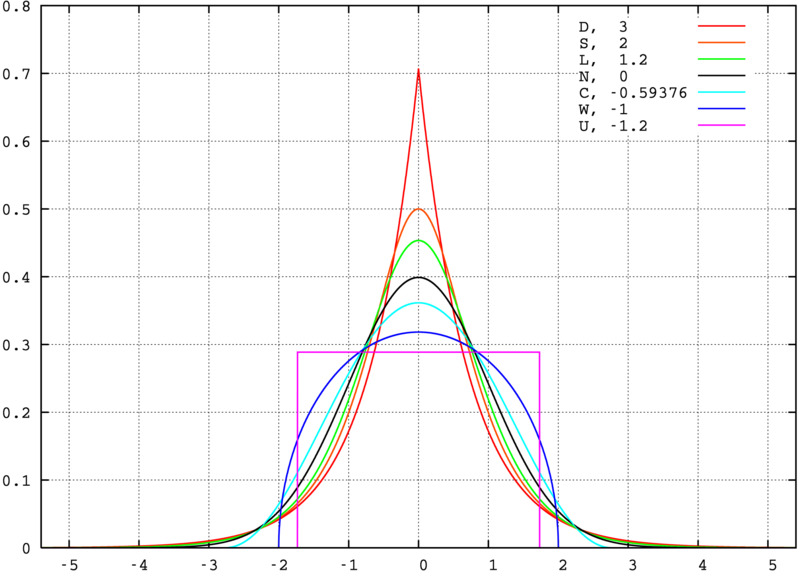

In [5]:
display_png(file="kurtosis.png") 

We can see that for example, the TOEFL.Score is near to follow a distribution Law of Cosinus (around -0.593762).

* The skew indicator helps us to know in which direction the 'tail' of the asymetric or symetric distribution is going. We will take the example of Reseach again, which confirms the fact that the low values reprsents the tail following the negative skew coefficient.

Let's check for outliers over our dataset :

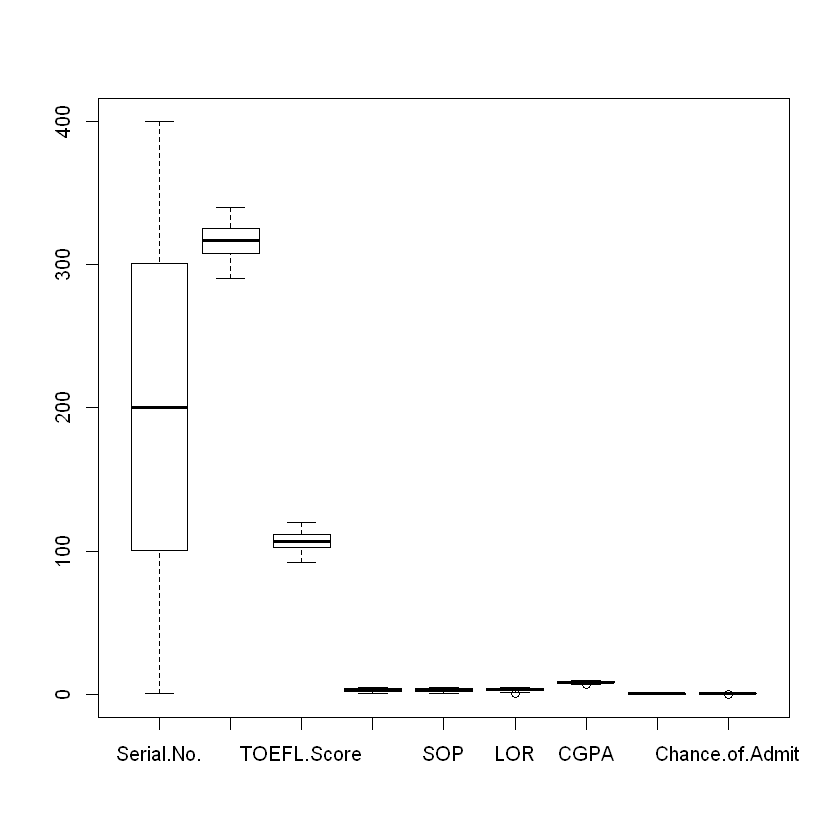

In [7]:
boxplot(csv)

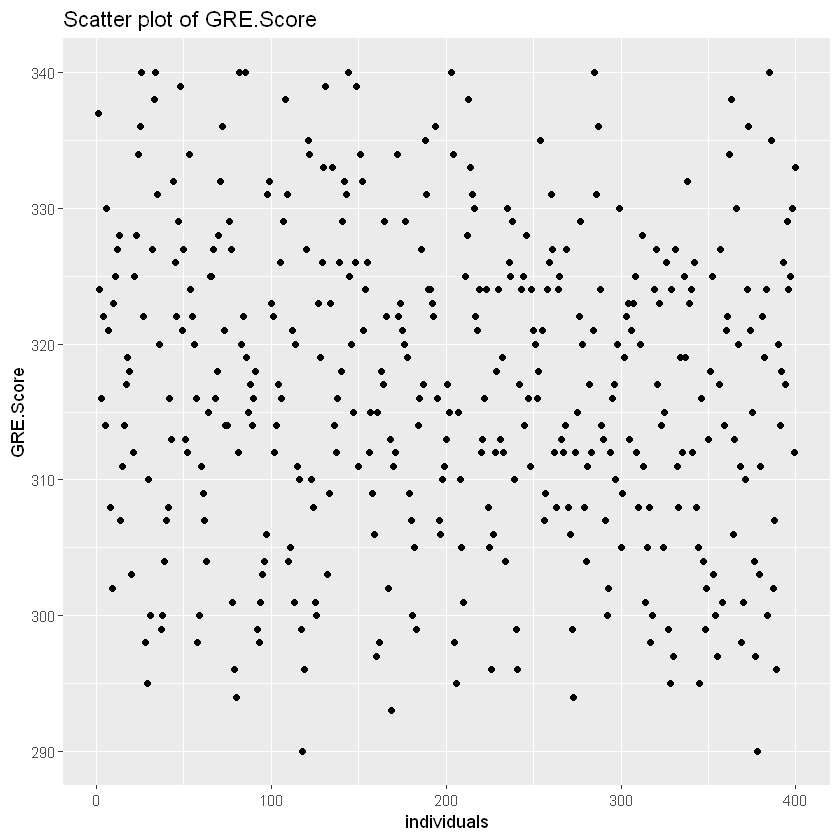

In [8]:
ggplot(csv, aes(x = csv[1:nrow(csv),1], y = csv[1:nrow(csv),2])) + geom_point() + 
    labs(title = "Scatter plot of GRE.Score", 
         x = "individuals", y = "GRE.Score")

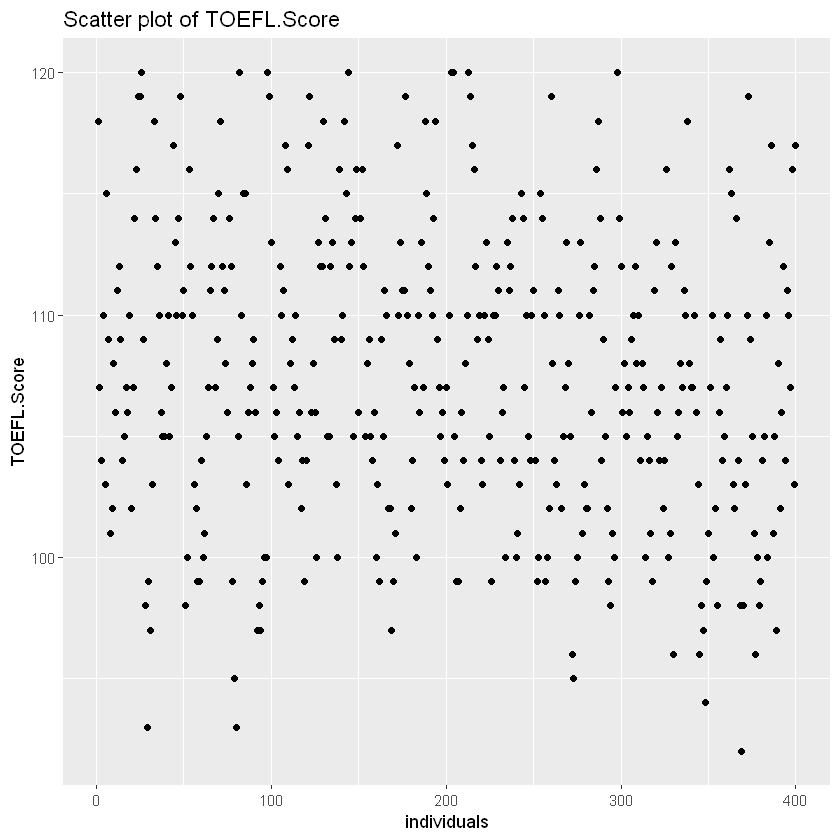

In [9]:
ggplot(csv, aes(x = csv[1:nrow(csv),1], y = csv[1:nrow(csv),3])) + geom_point() + 
    labs(title = "Scatter plot of TOEFL.Score", 
         x = "individuals", y = "TOEFL.Score")

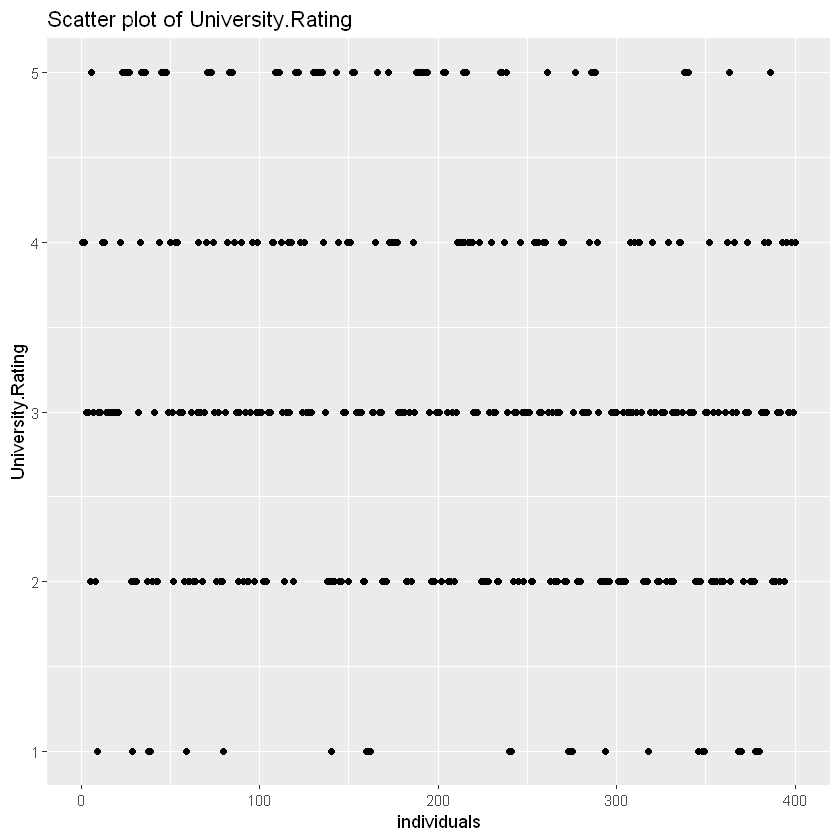

In [10]:
ggplot(csv, aes(x = csv[1:nrow(csv),1], y = csv[1:nrow(csv),4])) + geom_point() + 
    labs(title = "Scatter plot of University.Rating", 
         x = "individuals", y = "University.Rating")

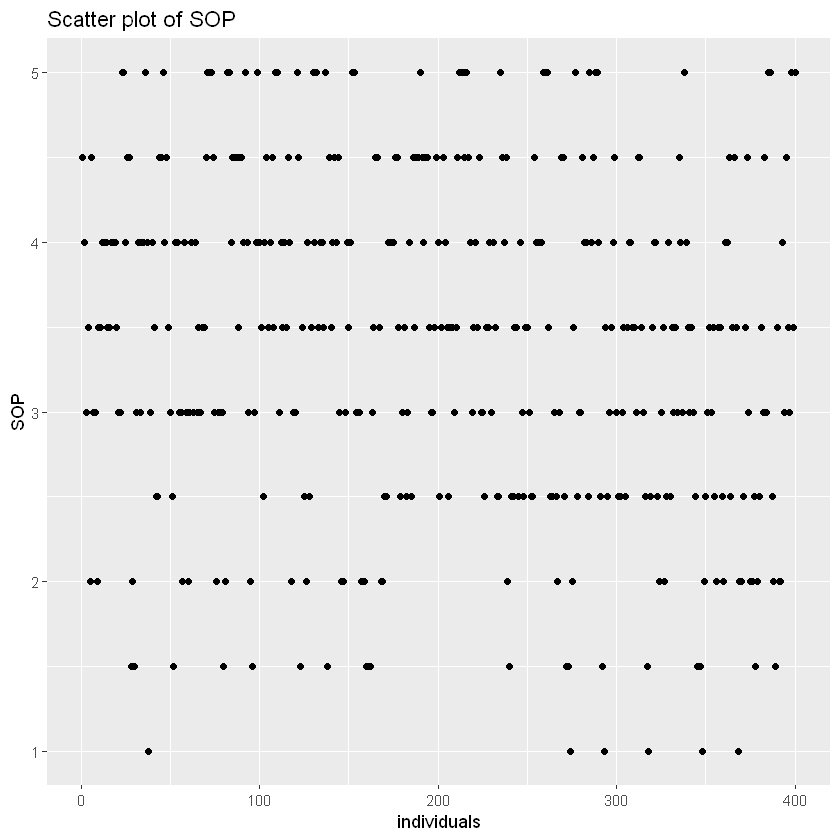

In [11]:
ggplot(csv, aes(x = csv[1:nrow(csv),1], y = csv[1:nrow(csv),5])) + geom_point() + 
    labs(title = "Scatter plot of SOP", x = "individuals", y = "SOP")

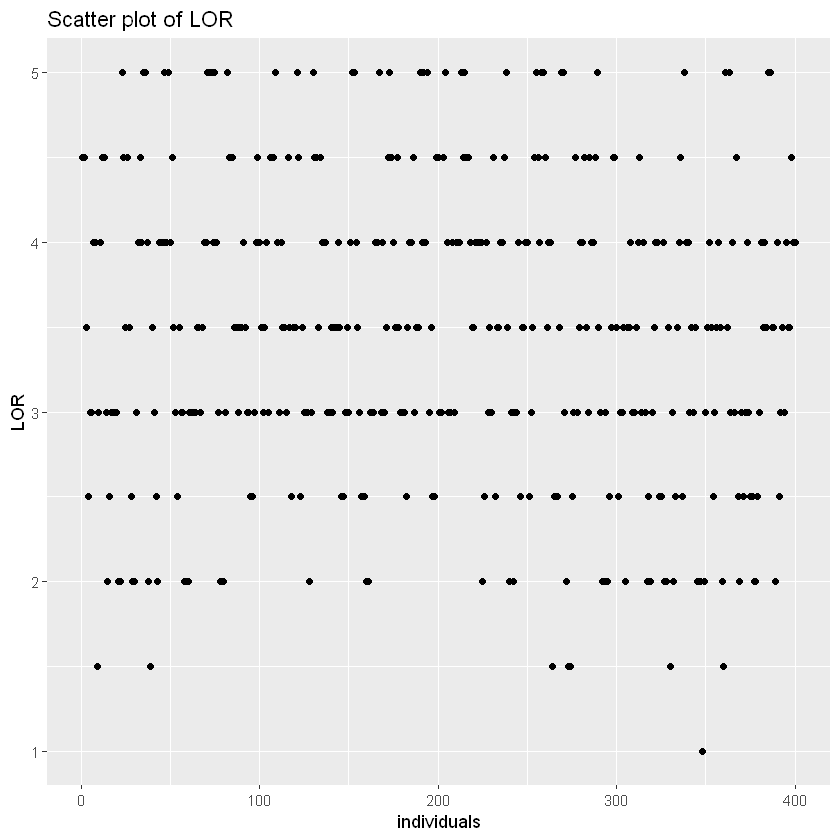

In [12]:
ggplot(csv, aes(x = csv[1:nrow(csv),1], y = csv[1:nrow(csv),6])) + geom_point() + 
    labs(title = "Scatter plot of LOR", x = "individuals", y = "LOR")

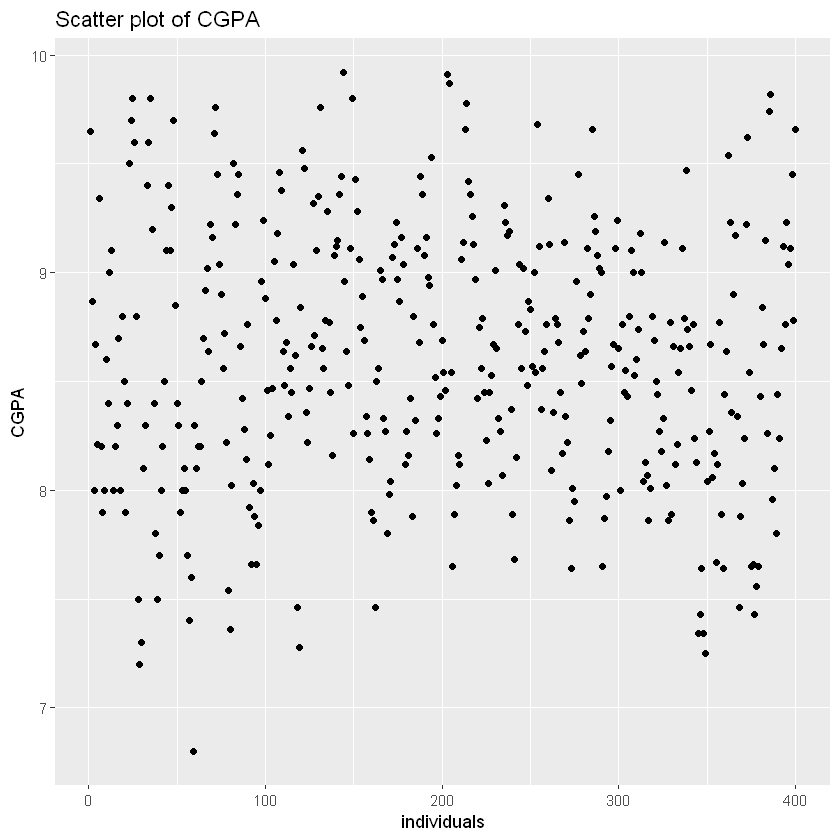

In [13]:
ggplot(csv, aes(x = csv[1:nrow(csv),1], y = csv[1:nrow(csv),7])) + geom_point() + 
    labs(title = "Scatter plot of CGPA", x = "individuals", y = "CGPA")

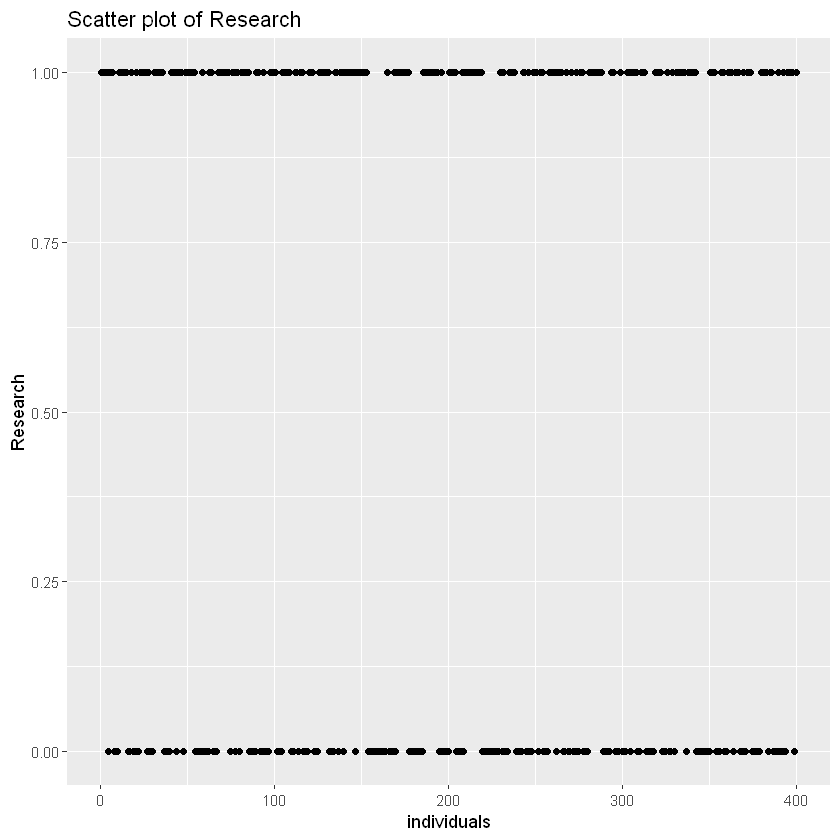

In [14]:
ggplot(csv, aes(x = csv[1:nrow(csv),1], y = csv[1:nrow(csv),8])) + geom_point() + 
    labs(title = "Scatter plot of Research", x = "individuals", y = "Research")

We can see there are two methods to rank students :

* The first one deals with continuous values, ranking people with numerical data.
* The second one deals with categorical data (and more precisely ordinal data), using discrete action space.

Those plots do not really helps us to interpret more informations but rather confirms what we could have seen in the data describing.

In [15]:
correlation_pearson_csv <- melt(cor(csv[1:nrow(csv),0:-1], 
                                    method = c("pearson")))
correlation_kendall_csv <- melt(cor(csv[1:nrow(csv),0:-1], 
                                    method = c("kendall")))
correlation_spearman_csv <- melt(cor(csv[1:nrow(csv),0:-1], 
                                     method = c("spearman")))

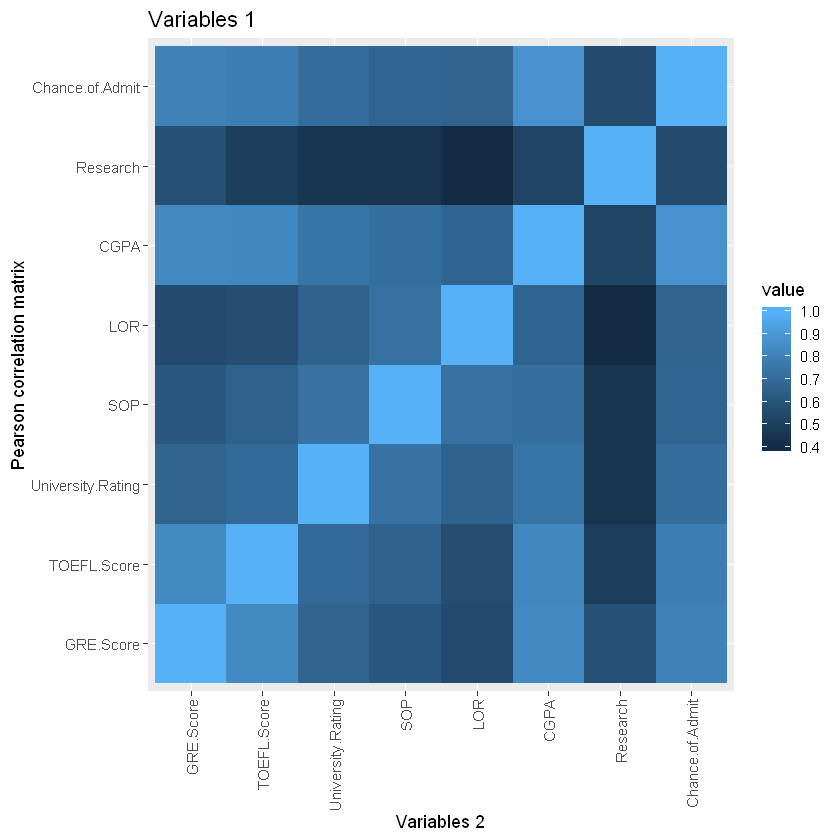

In [16]:
ggplot(data = correlation_pearson_csv, aes(x=Var1, y=Var2, fill=value)) + geom_tile() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    labs(title = "Variables 1", x = "Variables 2",
         y = "Pearson correlation matrix")

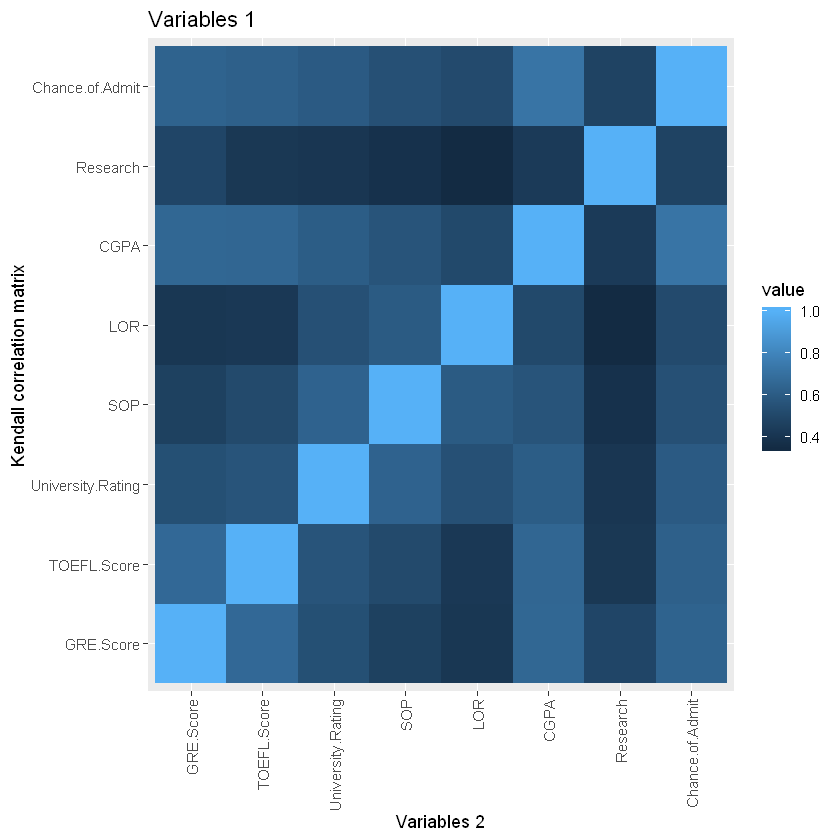

In [17]:
ggplot(data = correlation_kendall_csv, aes(x=Var1, y=Var2, fill=value)) + geom_tile() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    labs(title = "Variables 1", x = "Variables 2", 
         y = "Kendall correlation matrix")

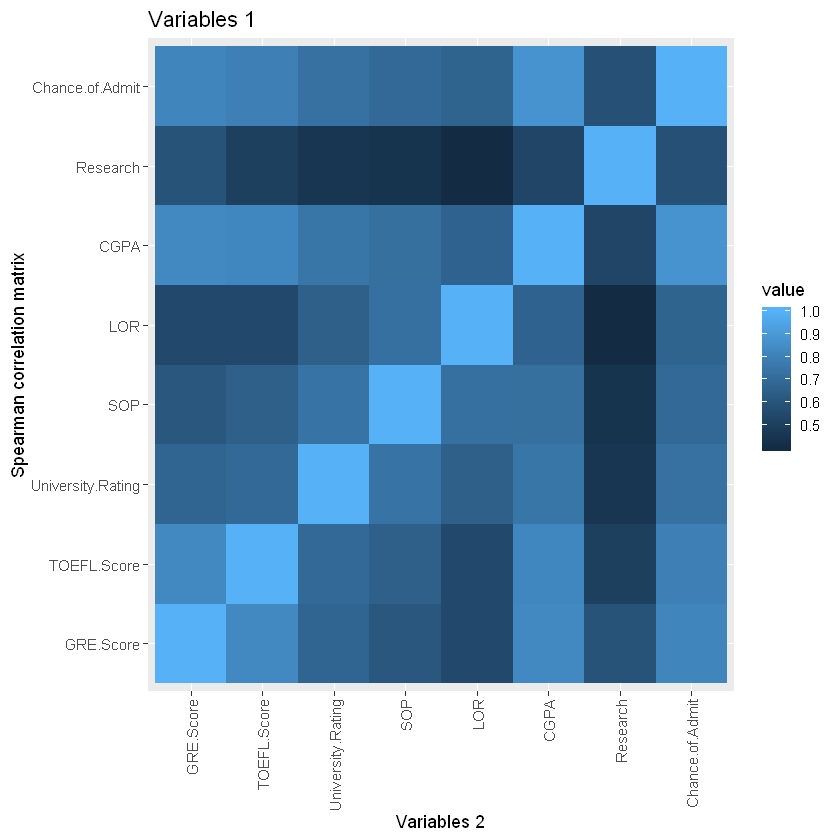

In [18]:
ggplot(data = correlation_spearman_csv, aes(x=Var1, y=Var2, fill=value)) + geom_tile() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    labs(title = "Variables 1", x = "Variables 2", 
         y = "Spearman correlation matrix")

As we can quickly see, there are some linear correlation following the 3 indicators 'Pearson, Kendall and Spearman'.

* GRE.Score, TOEFL.Score and CPGA are higly correlated one by one but also to Chance of Admits. This means that those scores higly determines the chances to be admitted by themselves.

Let's plot those variables in order to have a confirmation

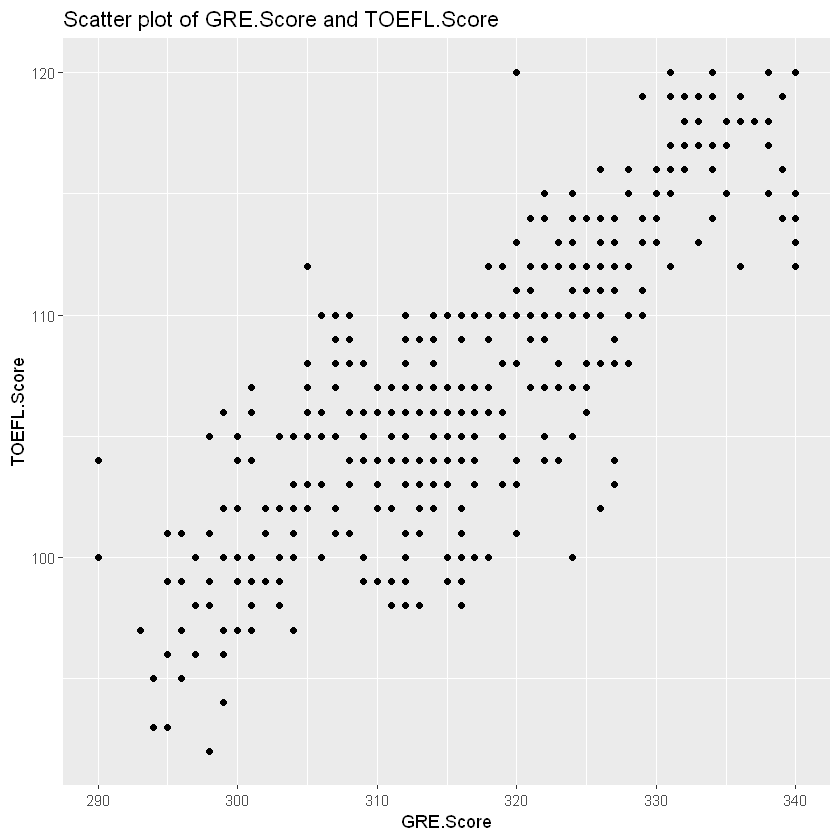

In [19]:
ggplot(csv, aes(x = csv[1:nrow(csv),2], y = csv[1:nrow(csv),3])) + geom_point() + 
    labs(title = "Scatter plot of GRE.Score and TOEFL.Score", 
         x = "GRE.Score", y = "TOEFL.Score")

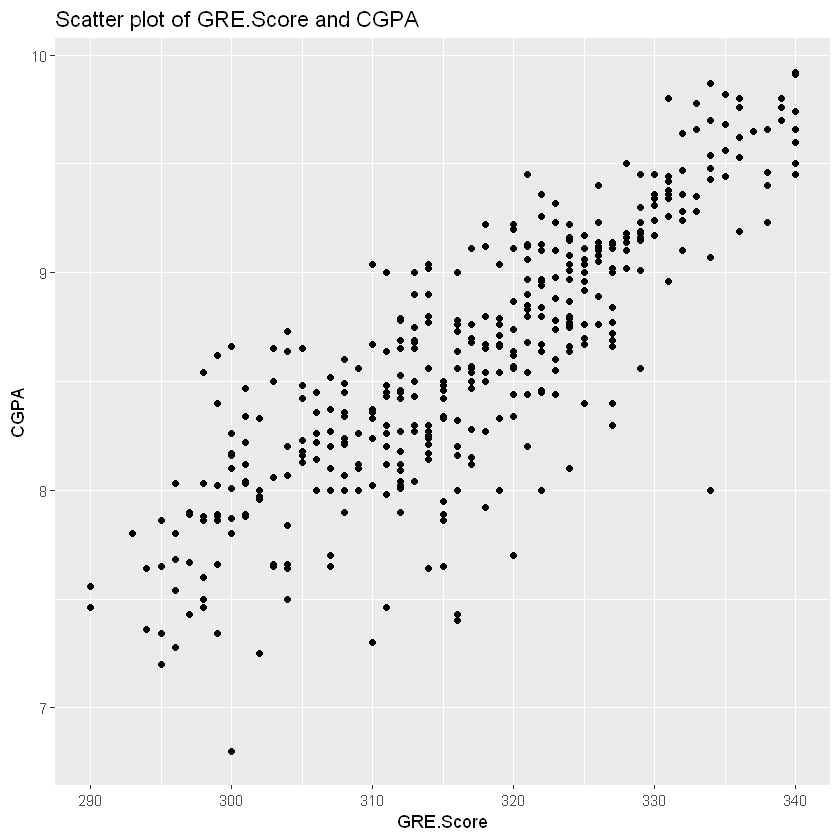

In [20]:
ggplot(csv, aes(x = csv[1:nrow(csv),2], y = csv[1:nrow(csv),7])) + geom_point() + 
    labs(title = "Scatter plot of GRE.Score and CGPA", x = "GRE.Score", 
         y = "CGPA")

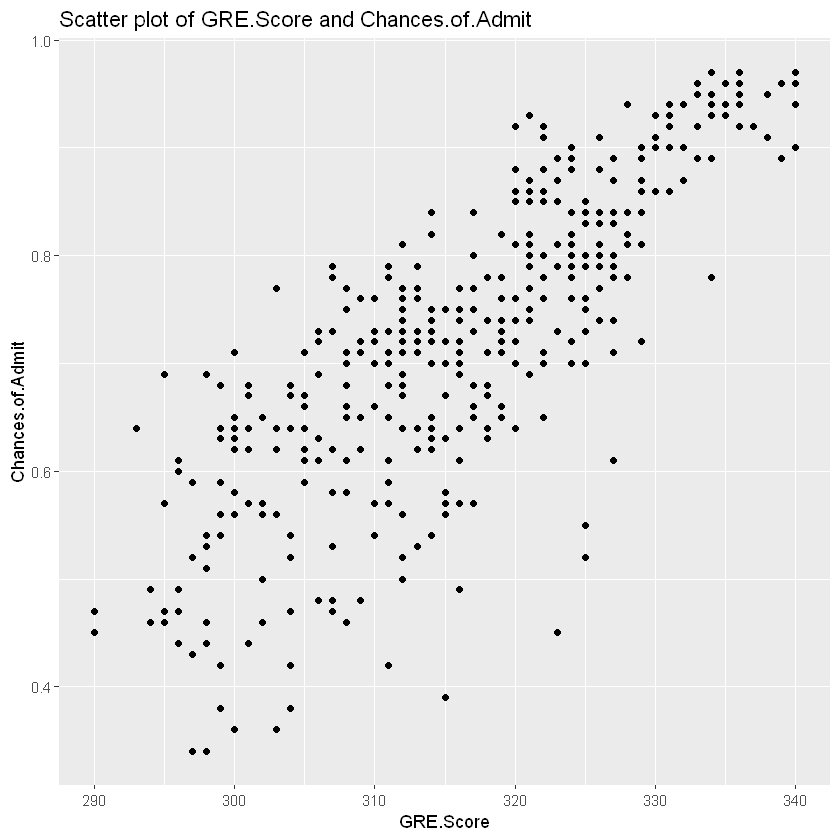

In [21]:
ggplot(csv, aes(x = csv[1:nrow(csv),2], y = csv[1:nrow(csv),9])) + geom_point() + 
    labs(title = "Scatter plot of GRE.Score and Chances.of.Admit", 
         x = "GRE.Score", y = "Chances.of.Admit")

We easily understand why linear regression could be a good approximation of this dataset seing those last plots.

We could have continued with PCA and T-SNE data reduction in order to have more comprehension over the dataset. Since it's not the aim of this exercise, we will pursue with the linear regression.

### Machine Learning

#### Re-arranging Data

In [22]:
# Data are numbers ?
str(csv)
# train/test splitting
inTrain = ml::createDataPartition(y = csv[1:nrow(csv),9], p = .80, 
                                  list = FALSE)
train_csv <- csv[inTrain,2:ncol(csv)]
test_csv <- csv[-inTrain,2:ncol(csv)]
head(train_csv)
head(test_csv)
print(paste("Train : ",nrow(train_csv)))
print(paste("Test : ",nrow(test_csv)))

'data.frame':	400 obs. of  9 variables:
 $ Serial.No.       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ GRE.Score        : int  337 324 316 322 314 330 321 308 302 323 ...
 $ TOEFL.Score      : int  118 107 104 110 103 115 109 101 102 108 ...
 $ University.Rating: int  4 4 3 3 2 5 3 2 1 3 ...
 $ SOP              : num  4.5 4 3 3.5 2 4.5 3 3 2 3.5 ...
 $ LOR              : num  4.5 4.5 3.5 2.5 3 3 4 4 1.5 3 ...
 $ CGPA             : num  9.65 8.87 8 8.67 8.21 9.34 8.2 7.9 8 8.6 ...
 $ Research         : int  1 1 1 1 0 1 1 0 0 0 ...
 $ Chance.of.Admit  : num  0.92 0.76 0.72 0.8 0.65 0.9 0.75 0.68 0.5 0.45 ...


,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
9,302,102,1,2.0,1.5,8.00,0,0.50


,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
6,330,115,5,4.5,3.0,9.34,1,0.90
7,321,109,3,3.0,4.0,8.20,1,0.75
8,308,101,2,3.0,4.0,7.90,0,0.68
11,325,106,3,3.5,4.0,8.40,1,0.52
12,327,111,4,4.0,4.5,9.00,1,0.84
13,328,112,4,4.0,4.5,9.10,1,0.78


[1] "Train :  322"
[1] "Test :  78"


In [23]:
# First way of doing without any package
# linearMod <- lm(Chance.of.Admit ~ ., data=train_csv)
# summary(linearMod)

# Second way of doing using caret-lattice package
fitControl <- ml::trainControl(method = "repeatedcv", number = 3, repeats = 3)
regress <- ml::train(Chance.of.Admit ~ ., data = train_csv, 
                     method = "lm", trControl = fitControl)
summary(regress)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25747 -0.02338  0.00914  0.03599  0.16426 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.1679569  0.1329307  -8.786  < 2e-16 ***
GRE.Score          0.0013746  0.0006458   2.128 0.034080 *  
TOEFL.Score        0.0027301  0.0012056   2.265 0.024222 *  
University.Rating  0.0043070  0.0050164   0.859 0.391231    
SOP               -0.0028466  0.0060599  -0.470 0.638860    
LOR                0.0243216  0.0060538   4.018 7.36e-05 ***
CGPA               0.1233330  0.0134632   9.161  < 2e-16 ***
Research           0.0298928  0.0086033   3.475 0.000584 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06283 on 314 degrees of freedom
Multiple R-squared:  0.8084,	Adjusted R-squared:  0.8041 
F-statistic: 189.3 on 7 and 314 DF,  p-value: < 2.2e-16


as we can see, the P-values indicates us that some of the data are quite more relevant than others as we predicted with visualization :

* LOR and CGPA have a really low p-value which means that the confidence that they predict well is high.
* GRE.Score, TOEFL.Score and Research are also usefull but with a less confidence (still really high in this case).
* University.Rating, SOP have a high p-values meaning that these are not good variables (confidence) to determines the chances of admission

In [24]:
y_pred <- predict(regress, newdata = test_csv)
y_true <- test_csv[,ncol(test_csv)]

In [25]:
print_res <- function(y_true, y_pred){
    print(paste0("RMSE => ", round(metrics::rmse(y_true, y_pred),3)))
    print(paste0("MSE  => ", round(metrics::mse(y_true, y_pred),3)))
    print(paste0("MBE  => ", round(metrics::bias(y_true, y_pred),3)))
    print(paste0("MAE  => ", round(mean(Metrics::ae(y_true, y_pred)),3)))
    print(paste0("MAPE  => ", round(mean(Metrics::ape(y_true, y_pred)),3)))
    print(paste0("R2   => ", round(mlmetrics::R2_Score(y_true, y_pred),3)))
}

In [26]:
print_res(y_true, y_pred)

[1] "RMSE => 0.068"
[1] "MSE  => 0.005"
[1] "MBE  => -0.005"
[1] "MAE  => 0.048"
[1] "MAPE  => 0.077"
[1] "R2   => 0.718"


The result are quite good on the test set, meaning that all errors indicators are quite low.

#### Support Vector Machine (SVM)

In [27]:
fitControl <- ml::trainControl(method = "repeatedcv", number = 3, repeats = 3)
svm <- ml::train(Chance.of.Admit ~ ., data = train_csv, 
                 method  = "svmLinear", trControl = fitControl)
summary(svm)

Length  Class   Mode 
     1   ksvm     S4 

In [28]:
y_pred <- predict(svm, newdata = test_csv)
y_true <- test_csv[,ncol(test_csv)]

In [29]:
print_res(y_true, y_pred)

[1] "RMSE => 0.069"
[1] "MSE  => 0.005"
[1] "MBE  => -0.014"
[1] "MAE  => 0.047"
[1] "MAPE  => 0.078"
[1] "R2   => 0.688"


The result are quite good on the test set, but not better than the basic linear regression.

#### XGBoost

In [30]:
fitControl <- ml::trainControl(method = "repeatedcv", number = 3, repeats = 3)
svm <- ml::train(Chance.of.Admit ~ ., data = train_csv, 
                 method  = "xgbTree", trControl = fitControl)
summary(svm)

              Length Class              Mode       
handle            1  xgb.Booster.handle externalptr
raw           13359  -none-             raw        
niter             1  -none-             numeric    
call              5  -none-             call       
params            8  -none-             list       
callbacks         1  -none-             list       
feature_names     7  -none-             character  
nfeatures         1  -none-             numeric    
xNames            7  -none-             character  
problemType       1  -none-             character  
tuneValue         7  data.frame         list       
obsLevels         1  -none-             logical    
param             0  -none-             list       

In [31]:
y_pred <- predict(svm, newdata = test_csv)
y_true <- test_csv[,ncol(test_csv)]

In [32]:
print_res(y_true, y_pred)

[1] "RMSE => 0.074"
[1] "MSE  => 0.005"
[1] "MBE  => -0.009"
[1] "MAE  => 0.052"
[1] "MAPE  => 0.084"
[1] "R2   => 0.633"


## Conclusion of the report

We had the opportunity to see both how to handle classification and regression models using Sklearn(Python) and caret(R). We also learnt about metrics and how to interpret them. 